# Fourier Analysis of Real World Data

## Example 1:  S&P 500 Data

Fourier analysis can be applied to any time series.  Here we will look at the
daily closing price of the S&P 500 over the last ten years.  The data is available
from [St. Louis Fed](https://fred.stlouisfed.org/series/SP500).

The data is stored in a CSV file, which we can read using the `pandas` library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the data from the CSV file.
data = pd.read_csv('SP500.csv',parse_dates=True)

# Print the first few rows.
data.head()

,DATE,SP500
0,2014-01-21,1843.80
1,2014-01-22,1844.86
2,2014-01-23,1828.46
3,2014-01-24,1790.29
4,2014-01-27,1781.56


In [3]:
# Clean up the data.
data = data.dropna()

# Remove rows with no closing price.
data = data[data['SP500'] != '.']

# Convert the closing price to a float.
data['SP500'] = data['SP500'].astype(float)

# Convert the date to a datetime object.
data['DATE'] = pd.to_datetime(data['DATE'])

# Extract the closing price and date.
closing = data['SP500']
date = data['DATE']

# Print the first few rows.
data.head()

# Convert the closing price to a numpy array.
closing = np.array(closing)

# Convert the date to a number of days since the first date.
startdate = date.loc[0]
date = (date - startdate).dt.days

print(len(date))
print(len(closing))

2517
2517


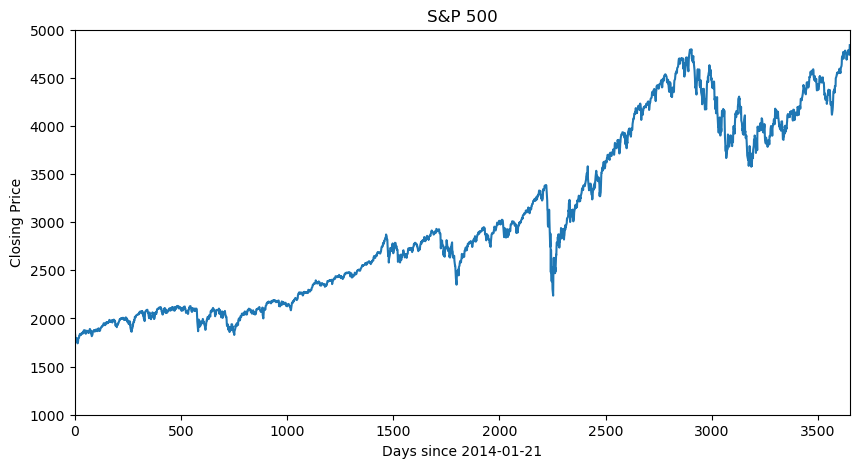

In [4]:
# Plot the closing price.
plt.figure(figsize=(10,5))
plt.plot(date,closing)
plt.xlabel('Days since ' + str(startdate.date()))
plt.ylabel('Closing Price')
plt.title('S&P 500')
plt.xlim(0,3650)
plt.ylim(1000,5000)
plt.show()


Interesting Frequencies:
Week: 0.14246575342465753
Month: 0.03287671232876712
1/2 year: 0.005479452054794521
1 year: 0.0027397260273972603
Nyquist frequency = 1258.5


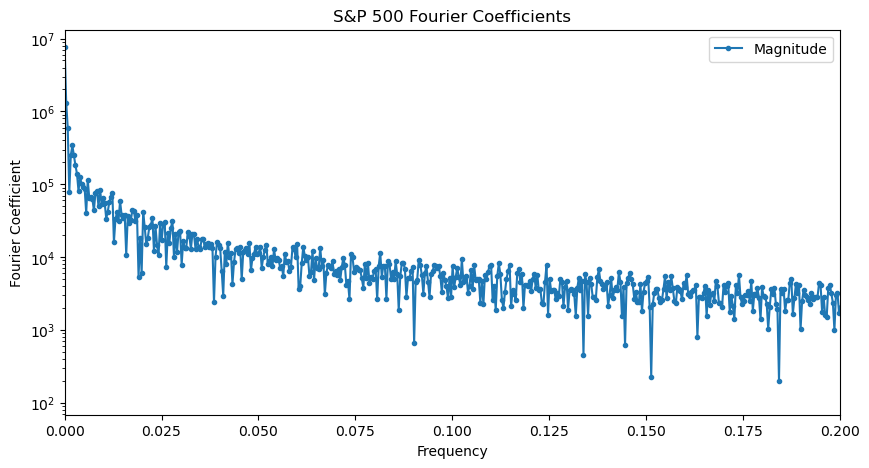

In [5]:
# Calculate the Fourier coefficients.

print("Interesting Frequencies:")
print("Week:",52/(365))
print("Month:",12/(365))
print("1/2 year:",2/(365))
print("1 year:",1/365)

# Calculate the Nyquist frequency.
nyquist = 0.5 * len(closing)
print('Nyquist frequency =',nyquist)

# Number of Fourier coefficients to calculate.
N = 1258

# Calculate the Fourier coefficients.
coeff = np.fft.fft(closing)[:N]

# Calculate the frequencies.
freq = np.fft.fftfreq(len(closing))[:N]

# Plot the Fourier coefficients.
plt.figure(figsize=(10,5))
#plt.plot(freq,coeff.real,label='Real')
#plt.plot(freq,coeff.imag,label='Imaginary')
plt.plot(freq,np.abs(coeff),'.-',label='Magnitude')
plt.xlabel('Frequency')
plt.ylabel('Fourier Coefficient')
plt.title('S&P 500 Fourier Coefficients')
plt.xlim(0,0.2)
plt.yscale('log')
plt.legend()

# Example 2:  COVID-19 Data

Another example of a time series is the number of new COVID-19 cases in the United States.  This data is based on the number of new cases $reported$ each day.  The data is available from [CDC](https://covid.cdc.gov/covid-data-tracker/#trends_dailytrendscases).

The key word here is "reported".  One interesting thing of note is that the government office(s) that record this data are not always open on weekends.  Thus, the number of new cases reported on Monday is the sum of the new cases reported on Saturday and Sunday.  This means that the data is not evenly sampled, and we need to be careful when applying Fourier analysis.

In [6]:
import pandas as pd
#import os
#os.chdir("/Users/brash/phys340/JupyterNotebooks/Fourier_Series/")
df = pd.read_csv('US.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16020 entries, 0 to 16019
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   submission_date  16020 non-null  object 
 1   state            16020 non-null  object 
 2   tot_cases        16020 non-null  int64  
 3   conf_cases       5566 non-null   float64
 4   prob_cases       5566 non-null   float64
 5   new_case         16020 non-null  int64  
 6   pnew_case        10756 non-null  float64
 7   tot_death        16020 non-null  int64  
 8   conf_death       5923 non-null   float64
 9   prob_death       5923 non-null   float64
 10  new_death        16020 non-null  int64  
 11  pnew_death       10754 non-null  float64
 12  created_at       16020 non-null  object 
 13  consent_cases    13083 non-null  object 
 14  consent_deaths   13350 non-null  object 
dtypes: float64(6), int64(4), object(5)
memory usage: 1.8+ MB


In [8]:
# A lot of the work in data science is cleaning up the data, or massaging
# it into a form that is useful for analysis.  Here we will convert the
# date to a datetime object, and calculate the number of days since the
# first date in the data set.
    
df['date'] = pd.to_datetime(df['submission_date'])    
df['date_delta'] = (df['date'] - df['date'].min())  / np.timedelta64(1,'D')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16020 entries, 0 to 16019
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   submission_date  16020 non-null  object        
 1   state            16020 non-null  object        
 2   tot_cases        16020 non-null  int64         
 3   conf_cases       5566 non-null   float64       
 4   prob_cases       5566 non-null   float64       
 5   new_case         16020 non-null  int64         
 6   pnew_case        10756 non-null  float64       
 7   tot_death        16020 non-null  int64         
 8   conf_death       5923 non-null   float64       
 9   prob_death       5923 non-null   float64       
 10  new_death        16020 non-null  int64         
 11  pnew_death       10754 non-null  float64       
 12  created_at       16020 non-null  object        
 13  consent_cases    13083 non-null  object        
 14  consent_deaths   13350 non-null  objec

/var/folders/5f/rgfnh64x7k1bfzln9qq9n76r0000gr/T/ipykernel_50310/174375392.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['submission_date'])


Text(0, 0.5, 'New Cases')

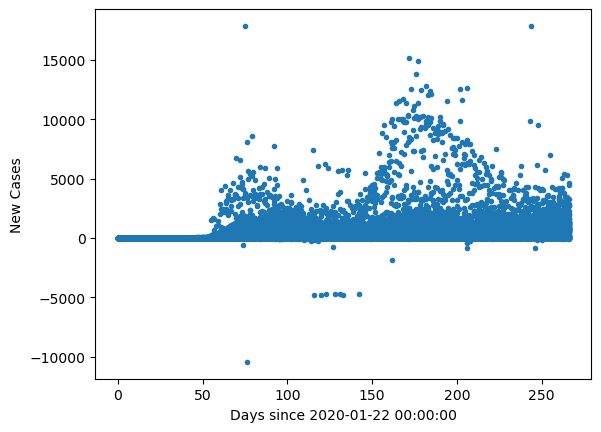

In [9]:
plt.plot(df['date_delta'],df['new_case'],'.')
plt.xlabel('Days since ' + str(df['date'].min()))
plt.ylabel('New Cases')

Total number of days in the sample: 266


Text(0, 0.5, 'New Cases')

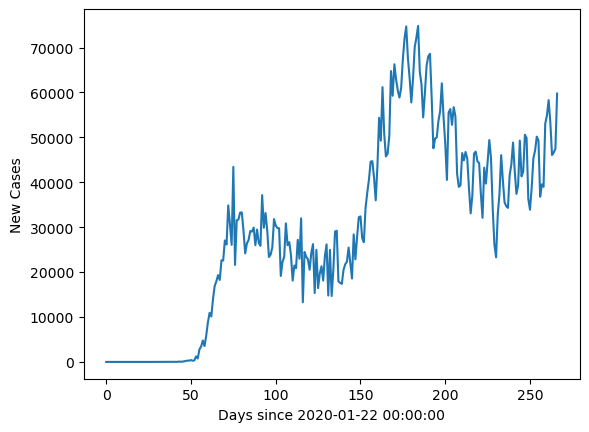

In [24]:
daymax = int(df['date_delta'].values.max())
print ("Total number of days in the sample:",daymax)

# Create an array (newsumbyday) to store the sum of new cases by day.
# This is the array that we will analyze using Fourier analysis.

newsumbyday = [0 for i in range(0,daymax+1)]
day = [i for i in range(0,daymax+1)]

for i in range(len(df)):
    current_day = int(df['date_delta'].values[i])
    newsumbyday[current_day] += df['new_case'].values[i]
    
plt.plot(day,newsumbyday,'-')
plt.xlabel('Days since ' + str(df['date'].min()))
plt.ylabel('New Cases')

In [25]:
# Recall that in Fourier analysis, we are looking for periodic behavior, and in the theory we are integrating over a range from -T to T.

# So, let's transform the x-axis to be from -T to T, where T is the total number of days in the sample.

tmin = np.min(day)
tmax = np.max(day)
tbar = (tmax-tmin)/2.0

day=day-tbar

print("Middle Day of the sample = ",pd.to_datetime(df['date'].min() + pd.to_timedelta(tbar,unit='D')))

Middle Day of the sample =  2020-06-03 00:00:00


Text(0.5, 0, 'Days since 2020-06-03 00:00:00')

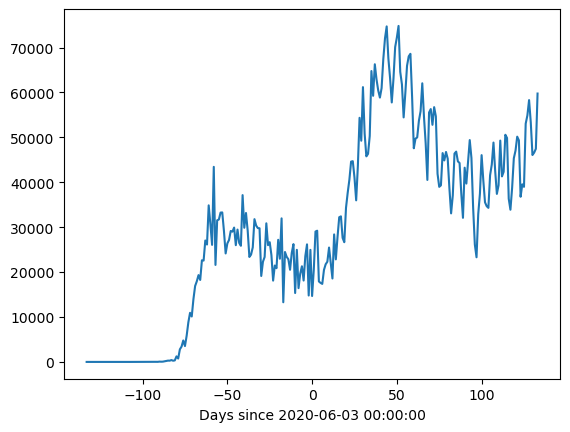

In [26]:
plt.plot(day,newsumbyday,'-')
fx = newsumbyday
plt.xlabel('Days since ' + str(df['date'].min() + pd.to_timedelta(tbar,unit='D')))

In [27]:
npts = len(day)
xlow = np.min(day)
xhigh = np.max(day)

x = np.linspace(xlow,xhigh,npts)
dt = (xhigh-xlow)/(npts-1)

print (xlow,xhigh,dt)

# Calculate the Nyquist frequency

f_sampling = 1.0/dt
f_nyquist = f_sampling/2.0

print ('Nyquist frequency = ',f_nyquist)

# the Nyquist frequency corresponds to the highest meaningful frequency component
#
# The terms in the Fourier approximation look like cos(n*np.pi*t/P) or sin(n*np.pi*t/P)
#
# Thus, omega = n*np.pi/P = n*np.pi/(xhigh-xlow)
#       f = omega/(2.0*np.pi) = n/(2.0*(xhigh-xlow))
#
#       f_nyquist = n_max/(2.0*(xhigh-xlow))
#
#       n_max = 2.0*(xhigh-xlow)*f_nyquist

nterms = int(2.0*(xhigh-xlow)*f_nyquist)

print ('Max terms = ',nterms)

nterms = int(133)

-133.0 133.0 1.0
Nyquist frequency =  0.5
Max terms =  266


In [28]:
x2 = np.linspace(xlow,xhigh,npts)
fx_fourier = np.zeros(len(x2))

n = []
an = []
bn = []
pn = []
fn = []

for i in range(nterms+1):
    P = xhigh
    n.append(i)
    fn.append(i/(2.0*P))

    # Method 2:  Numerical integration to calculate
    # the coefficients
    
    a0sum = 0.0
    ansum = 0.0
    bnsum = 0.0

    for k in range(len(x2)):
        a0sum = a0sum + 1/P*fx[k]*dt
        ansum = ansum + 1/P*fx[k]*np.cos(i*np.pi*x2[k]/P)*dt
        bnsum = bnsum + 1/P*fx[k]*np.sin(i*np.pi*x2[k]/P)*dt
        
    if (i==0):
        an.append(a0sum)
        bn.append(0)
        pn.append(np.sqrt(an[i]**2+bn[i]**2))
    else:
        an.append(ansum)
        bn.append(bnsum)
        pn.append(np.sqrt(an[i]**2+bn[i]**2))
        
    for j in range(len(x2)):
        if i==0:
            fx_fourier[j] = fx_fourier[j]+an[0]/2.0
        else:
            if (j==0 and i<=10): 
                print ("Data: n = %0.4f, a_n = %0.4f, bn = %0.4f" % (i,an[i],bn[i]))
            fx_fourier[j] = fx_fourier[j]+an[i]*np.cos(i*np.pi*x2[j]/P)+bn[i]*np.sin(i*np.pi*x2[j]/P) 

Data: n = 1.0000, a_n = 6727.3118, bn = 21542.1474
Data: n = 2.0000, a_n = -6914.4776, bn = -5396.9325
Data: n = 3.0000, a_n = -10619.6303, bn = 4618.4223
Data: n = 4.0000, a_n = -228.1728, bn = -4653.1868
Data: n = 5.0000, a_n = 1316.1034, bn = 1359.7774
Data: n = 6.0000, a_n = 630.4871, bn = -4317.0608
Data: n = 7.0000, a_n = -695.1708, bn = 2827.1891
Data: n = 8.0000, a_n = 632.1025, bn = -1224.8353
Data: n = 9.0000, a_n = 137.8234, bn = 1041.5061
Data: n = 10.0000, a_n = 337.2742, bn = -2181.3652


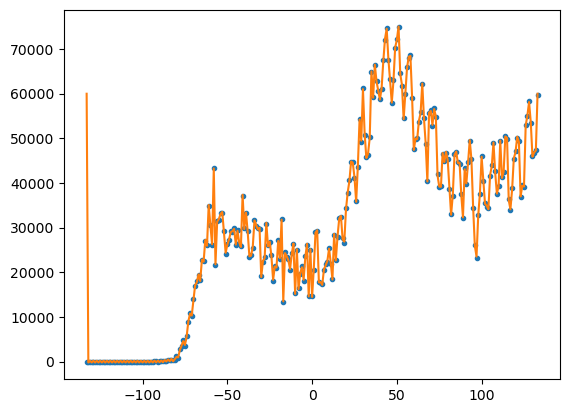

In [29]:
plt.plot(x,fx,'.')
plt.plot(x2,fx_fourier)

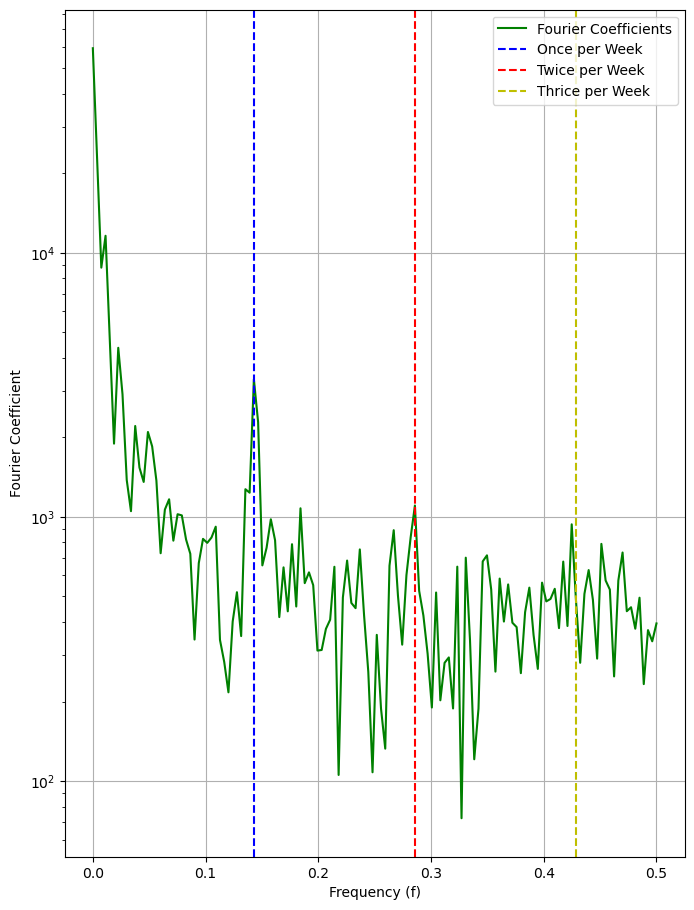

In [35]:
fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,11))
axs2.plot(fn,pn,'g-', label='Fourier Coefficients')
axs2.set_yscale('log')
axs2.set_xlabel('Frequency (f)')
axs2.set_ylabel('Fourier Coefficient')

# turn on grid
axs2.grid(True)

once_per_week = 1.0/7.0
twice_per_week = 2.0/7.0
thrice_per_week = 3.0/7.0

# Draw a vertical line at the once per week frequency
axs2.axvline(x=once_per_week, color='b', linestyle='--',label='Once per Week')
axs2.axvline(x=twice_per_week, color='r', linestyle='--',label='Twice per Week')
axs2.axvline(x=thrice_per_week, color='y', linestyle='--',label='Thrice per Week')
axs2.legend()